In [3]:
import numpy as np
import matplotlib as plt
import random 
from myTFMlibrary import *
import decomposition
import decompositionMod
import pandas as pd
import matplotlib.colors as mcolors

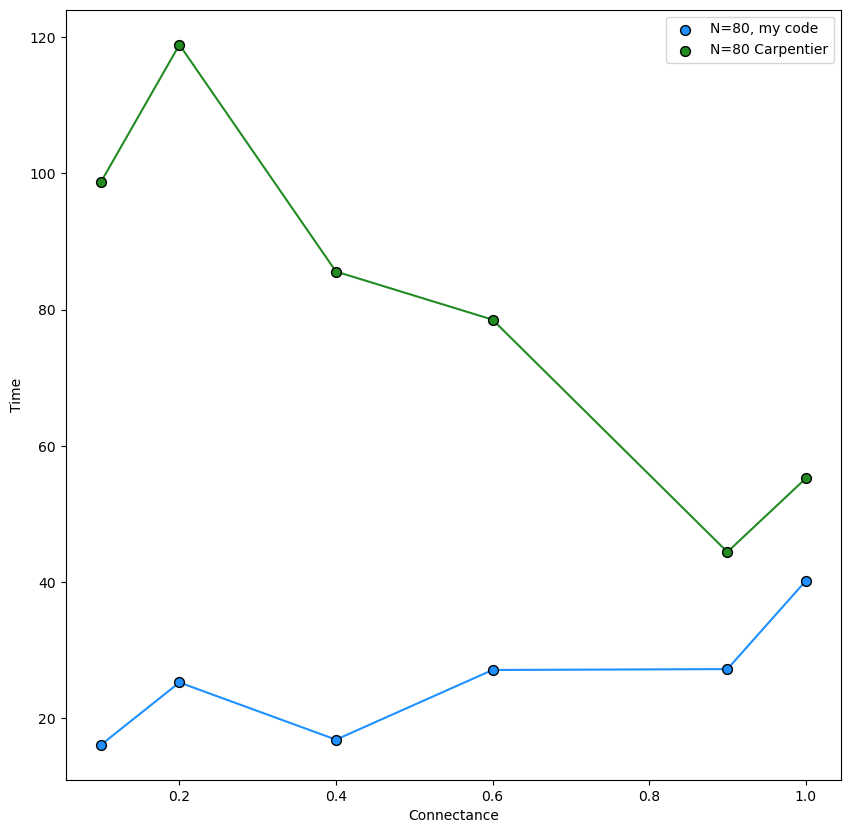

In [4]:


DIMMENTION  =[80]
CONNECTANCE =[0.1 ,0.2  ,0.4, 0.6, 0.9, 1]
nbsimu=1000

colors=['dodgerblue','forestgreen']
#Figure
fig1, ax = plt.subplots(1, 1, figsize=(10, 10))
#ax = ax.flatten()
ax1 = ax
#ax2 = ax[1]

for dim in DIMMENTION:
    mycodetime=[]
    carpentiertime=[]
    for con in CONNECTANCE:
        #Matrix Gen
        mat=BinaryMatrixGenerator(dim,con)

        #MycodeComputation
        start = timeit.default_timer()
        independent = False 
        S, L, b, z, sseq, lseq = decompositionMod.ExtinctionExperimentNetworkx(mat, nbsimu, independent)
        stop = timeit.default_timer()       #TIME COMPUTATION: END
        mycodetime.append(stop-start)

        #CarpentierComputation
        start = timeit.default_timer()
        independent = False 
        S, L, b, z, sseq, lseq = decomposition.experiment(mat, nbsimu, independent)
        stop = timeit.default_timer()       #TIME COMPUTATION: END
        carpentiertime.append(stop-start)
    ax1.plot(CONNECTANCE,mycodetime,
                        c=colors[0])
    ax1.scatter(CONNECTANCE,mycodetime,
                        c=colors[0],
                        alpha=1,
                        edgecolors='k',
                        s=50,
                        label="N="+str(dim)+", my code",
                        zorder=2)
                        
    ax1.plot(CONNECTANCE,carpentiertime,
                        c=colors[1])
    ax1.scatter(CONNECTANCE,carpentiertime,
                        c=colors[1],
                        alpha=1,
                        edgecolors='k',
                        s=50,
                        label="N="+str(dim)+" Carpentier",
                        zorder=2)
    ax1.set(xlabel="Connectance",ylabel="Time")
    ax1.legend()
    plt.savefig("TimeAnalysis.pdf")
